C:\Users\pault\AppData\Local\Temp\ipykernel_26804\1208504016.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='main_task', order=df['main_task'].value_counts().index, palette='Blues_d')


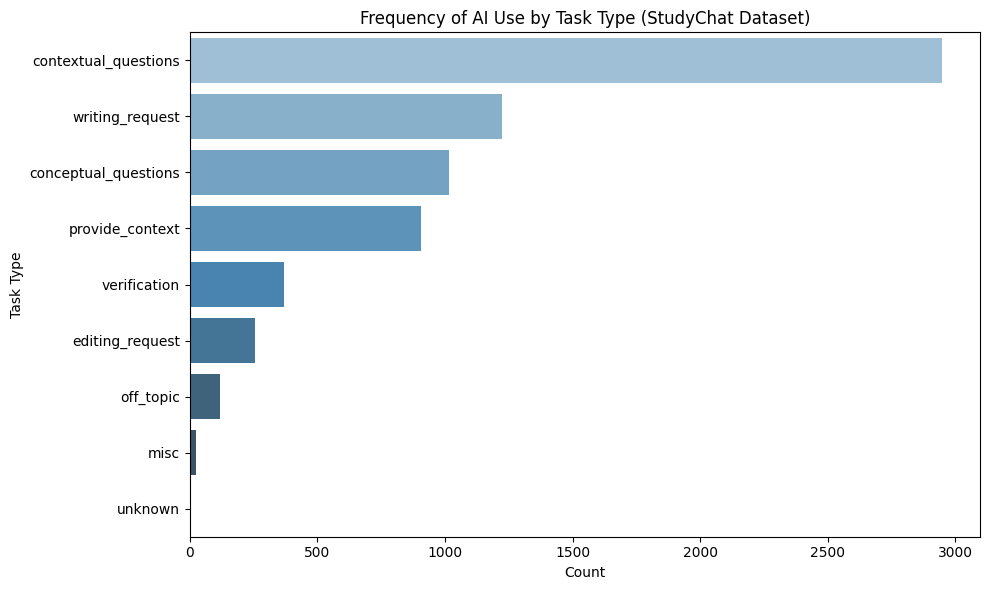

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load StudyChat JSON file
with open("filtered_a1_to_a7_dataset.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract relevant fields into a DataFrame
records = []
for entry in data:
    label = entry.get("llm_label", {}).get("label", "unknown")
    week = entry.get("week", None)  # if week exists
    prompt = entry.get("prompt", entry.get("messages", [{}])[1].get("content", ""))
    records.append({"label": label, "prompt": prompt, "week": week})

df = pd.DataFrame(records)

# Clean label (flatten to main task)
df['main_task'] = df['label'].str.extract(r'([a-zA-Z_]+)')

# Plot task frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='main_task', order=df['main_task'].value_counts().index, palette='Blues_d')
plt.title("Frequency of AI Use by Task Type (StudyChat Dataset)")
plt.xlabel("Count")
plt.ylabel("Task Type")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from collections import Counter

# Extract llm_label types
labels = [entry.get('llm_label', {}).get('label') for entry in data if 'llm_label' in entry]
label_counts = Counter(labels)

# Convert to DataFrame
df_labels = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)
df_labels['%'] = (df_labels['Frequency'] / df_labels['Frequency'].sum() * 100).round(1)

print(df_labels.reset_index().rename(columns={"index": "Task Type"}))


                                        Task Type  Frequency     %
0                      contextual_questions>Other       1608  23.4
1           contextual_questions>Code Explanation        728  10.6
2                      writing_request>Write Code        587   8.6
3   contextual_questions>Assignment Clarification        510   7.4
4             conceptual_questions>Python Library        364   5.3
5              conceptual_questions>Other Concept        275   4.0
6                            provide_context>Code        259   3.8
7                           writing_request>Other        250   3.6
8                           provide_context>Other        241   3.5
9                        verification>Verify Code        233   3.4
10                  provide_context>Error Message        232   3.4
11           writing_request>Code/Data Conversion        204   3.0
12      conceptual_questions>Programming Language        196   2.9
13                      editing_request>Edit Code        177  

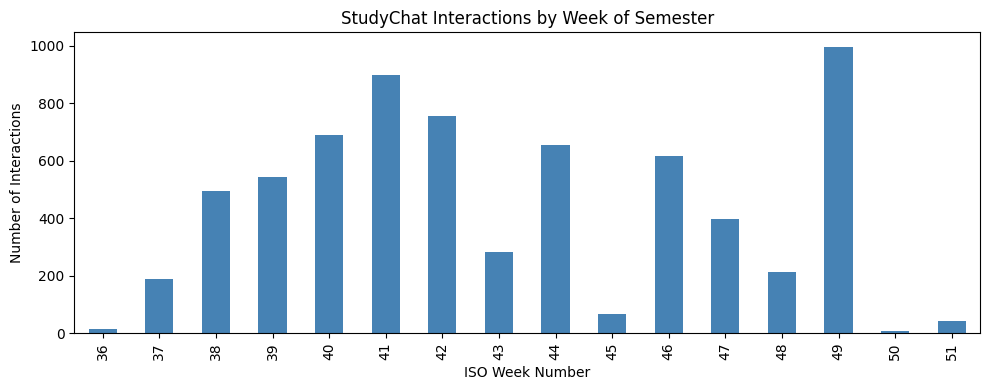

In [3]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Extract weeks from timestamp (milliseconds to seconds)
weeks = []
for entry in data:
    ts = entry.get("timestamp")
    if ts:
        try:
            dt = datetime.fromtimestamp(int(str(ts)[:10]))  # Convert ms to seconds
            week = dt.isocalendar().week  # ISO week number
            weeks.append(week)
        except:
            weeks.append(None)
    else:
        weeks.append(None)

# Create a Series and count
week_counts = pd.Series(weeks).dropna().astype(int).value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 4))
week_counts.plot(kind='bar', color='steelblue')
plt.title("StudyChat Interactions by Week of Semester")
plt.xlabel("ISO Week Number")
plt.ylabel("Number of Interactions")
plt.tight_layout()
plt.show()


In [4]:
# Extract prompts
prompts = [entry['prompt'] for entry in data if 'prompt' in entry]
prompt_lengths = [len(p.split()) for p in prompts if isinstance(p, str)]

# Summary stats
print(f"Average prompt length: {sum(prompt_lengths)/len(prompt_lengths):.2f} words")
print("Sample prompts:")
print(prompts[:5])  # or random.sample(prompts, 5)
multi_step_prompts = [p for p in prompts if "and" in p.lower() or "." in p]
print(f"Multi-step prompts detected: {len(multi_step_prompts)} / {len(prompts)}")


Average prompt length: 83.72 words
Sample prompts:
['The R-squared score represents the proportion of the variance in the dependent variable (Size nm³) that is predictable from the independent variables (Temperature and Mols KCl). An R-squared score of 1 indicates perfect prediction, while a score of 0 indicates that the model does not explain any of the variability in the target variable\nexplain this', 'explain variability in easy terms ', 'is it similar to standard deviation', 'The R-squared score measures how well the independent variables explain the variability of the dependent variable.\n\nexplain this concisely', 'so what is like the key takewaay keep it concise and easy to understand']
Multi-step prompts detected: 4149 / 6864


In [5]:
import json
import pandas as pd


# Extract prompts only (skip if 'prompt' is missing or empty)
prompts = [entry.get("prompt", "").strip() for entry in data if entry.get("prompt")]
df_prompts = pd.DataFrame(prompts, columns=["Prompt"])

# Preview first 100 prompts
sample_prompts = df_prompts.head(100)

# Display as numbered list
for i, prompt in enumerate(sample_prompts['Prompt'], 1):
    print(f"{i}. {prompt}")


1. The R-squared score represents the proportion of the variance in the dependent variable (Size nm³) that is predictable from the independent variables (Temperature and Mols KCl). An R-squared score of 1 indicates perfect prediction, while a score of 0 indicates that the model does not explain any of the variability in the target variable
explain this
2. explain variability in easy terms
3. is it similar to standard deviation
4. The R-squared score measures how well the independent variables explain the variability of the dependent variable.

explain this concisely
5. so what is like the key takewaay keep it concise and easy to understand
6. so basically if i were to give it an independent variable and have it give me an output based on the equation it'll give me a decently good fit
7. cross validation tests it on multiple sets, so does it randomly select data on my dataset? concise
8. rmse_poly = root_mean_squared_error(y_test_poly, y_pred_poly)
mse_poly = rmse_poly ** 2
r2_poly = r2